# 提升法Boosting

|方法|Bagging|Boosting|
|:---:|:---:|:---|
|弱评估器|相互独立，并行构建|相互关联，按顺序依次构建|
|建树前的抽样方式|样本有放回抽样、特征无放回抽样|样本有放回抽样、特征无放回抽样，先建若分类起的预测效果可能影响抽样细节|
|目标|降低方差来降低整体泛化误差|降低整体偏差|
|集成结果|回归平均、分类众数|每个算法具有自己独特的规则：加权平均、使用输出函数|
|代表算法|随机森林|梯度提升树，Adaboost|


Boosting算法的基本元素：
- 损失函数L(x,y):用于衡量模型预测结果与真实结果的差异
- 弱评估器f(x):一般为决策树，也可以是其他
- 综合集成结果H(x):即集成算法具体如何输出集成结果

Boosting算法的基本规则：

- 依据上一个弱评估器$f(x)_{x-1}$的结果，计算损失函数L(x,y)
- 并使用L(x,y)自适应的影响下一个弱评估器$f(x)_t$的构建
- 集成模型输出的结果，受到整体所有弱评估器$f(x)_0~f(x)_T$的影响

# AdaBoost 
Adaptive Boosting,自适应提升法

两个主要贡献：
1. 首次实现根据之前弱评估器的结果自适应地影响后续建模过程
2. 在Boosting算法中，首次考虑全部弱评估器结果的输出方式

In [1]:
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.datasets import load_digits

In [2]:
# 用于分类的数据(手写数字识别)
data_c = load_digits()
x_c = data_c.data
y_c = data_c.target

In [3]:
x_c.shape

(1797, 64)

In [4]:
x_c

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [6]:
import numpy as np
np.unique(y_c)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
import pandas as pd
# 用于回归的数据
data_r = pd.read_csv(r"/Users/feishuoren/Projects/machine_learning/datasets/HousePrice/train_encode.csv",index_col=0)
x_g = data_r.iloc[:,:-1]
y_g = data_r.iloc[:,-1]

In [9]:
x_g.shape

(1460, 80)

In [10]:
x_g.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,半开放式门廊面积,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0


- ADB 分类器的默认弱评估器是最大深度为1的“树桩”
- ADB 回归器的默认评估器是最大深度为3的“树苗”

回归相比较分类任务更复杂一些，所以深度更深

In [11]:
# 建立集成算法，调用其中的弱评估器

In [12]:
# 建立ADB回归器和分类器
clf = ABC(n_estimators=3).fit(x_c,y_c)
reg = ABR(n_estimators=3).fit(x_g,y_g)

In [13]:
clf.base_estimator_ # 弱评估器是分类树，这与XGBoot等都不同，他们的一律是回归树

DecisionTreeClassifier(max_depth=1)

In [14]:
reg.base_estimator_ # ，弱评估器是回归树，可以看到最大深度

DecisionTreeRegressor(max_depth=3)

In [15]:
reg.estimators_ # 可以看到当前集成算法的所有弱评估器

[DecisionTreeRegressor(max_depth=3, random_state=411559624),
 DecisionTreeRegressor(max_depth=3, random_state=1861388553),
 DecisionTreeRegressor(max_depth=3, random_state=185632829)]

In [16]:
# 自建弱评估器

In [17]:
base_estimator = DTC(max_depth = 10,max_features = 30)

In [18]:
clf = ABC(base_estimator = base_estimator,n_estimators=3).fit(x_c,y_c)

In [19]:
clf.base_estimator_

DecisionTreeClassifier(max_depth=10, max_features=30)

In [20]:
clf.estimators_

[DecisionTreeClassifier(max_depth=10, max_features=30, random_state=128782249),
 DecisionTreeClassifier(max_depth=10, max_features=30, random_state=49957339),
 DecisionTreeClassifier(max_depth=10, max_features=30, random_state=1423281246)]

In [21]:
# 不能自己输入random_state,输入了也忽略

$H_t(x_i) = H_{t-1}(x_i) + \eta \phi_tf_i(x_i)$

独有的损失函数：指数损失
- 二分类指数损失
$$L(H(x),y) = e^{-yH^*(x)}$$

其中：
$$H^*(x) = \begin{array}{cl}
 1 & if H(x)>0.5\\
-1 & if H(x)<0.5\\
\end{array}$$

- 多分类指数损失
$$L(H(x),y) = exp(-\frac{1}{k}y^*·H^*(x))\\
 = exp(-\frac{1}{K}(y^{*1}H^{*1}(x)+y^{*2}H^{*2}(x)+...+y^{*k}H^{*k}(x)))
$$


其中：
$$H^*(x) = \begin{array}{cl}
 1 & if K=argmaxH(x)\\
-\frac{1}{K-1} & if K \neq argmaxH(x)\\
\end{array}$$

$$y^* = \begin{array}{cl}
 1 & if k=y_i\\
-\frac{1}{K-1} & if k \neq y_i\\
\end{array}$$

In [24]:
# 多分类预测
clf = DTC(max_depth=2).fit(x_c,y_c)

# 多分类预测输出的概率结果，取前5个样本
pd.DataFrame(clf.predict_proba(x_c)).iloc[:5,:]

,0,1,2,3,4,5,6,7,8,9
0,0.909574,0.000000,0.010638,0.000000,0.031915,0.031915,0.015957,0.000000,0.000000,0.000000
1,0.003781,0.131380,0.120038,0.157845,0.134216,0.011342,0.003781,0.163516,0.158790,0.115312
2,0.003781,0.131380,0.120038,0.157845,0.134216,0.011342,0.003781,0.163516,0.158790,0.115312
3,0.000000,0.092672,0.099138,0.032328,0.071121,0.312500,0.370690,0.012931,0.006466,0.002155
4,0.909574,0.000000,0.010638,0.000000,0.031915,0.031915,0.015957,0.000000,0.000000,0.000000


In [26]:
# argmax函数可以拿到最大值对应的索引
np.argmax(pd.DataFrame(clf.predict_proba(x_c)).iloc[0,:])

0

AdaBoost回归中，唯一能使用的算法是 AdaBoost.R2

R2 算法中，可以选择三种损失函数:
- linear（线性）
    $$ Li = \frac{|H(x_i)-y_i|}{D}$$
- square（平方）
    $$ Li = \frac{|H(x_i)-y_i|^2}{D^2}$$
- exponential （指数）
    $$ Li = 1 - exp(\frac{-|H(x_i)-y_i|}{D})$$
    
其中：
$$D = sup|H(x_i)-y_i|,i=1,2,...,N$$

sup表示“取最大值”,D为样本中真实值与预测值差距最大的那组差异


任何损失函数`值域为[0,1]` 可以变为使用 R2算法的损失函数

## AdaBoost 的求解流程
对于任意Boosting算法，都需要明确以下几点：
- 损失函数的表达式是什么？对视函数如何影响模型构建？
- 弱评估器是什么？当下boosting算法使用的具体建树过程是什么？
- 综合集成结果是什么？集成算法具体如何输出集成结果？

其他问题：
- 是加权求和吗？权重如何求解？
- 训练过程中，拟合的数据X和y分别是什么？
- 模型训练到什么时候停下来最好？

## 基本流程
1. 初始化原始数据集的权重 wi,其中任意 $w_i = \frac{1}{M}$

开始循环 T 轮：

2. 在数据集N中，有放回的抽样M个样本，构成训练集 $N^t$。在每次抽取一个样本时，任意样本被抽中的概率为$P_i^t = \frac{w_i}{\sum{w_i}}$，该概率就是当前样本在训练集中的权重。第一次循环中 概率$P_i^1 = \frac{1}{M}$，当后续权重变化时，拥有更大权重的样本被抽中的概率会更大
3. 在训练集上按照CART树规则建立一颗回归树，训练时所拟合的标签为样本的真实标签 $y_i^t$
4. 将训练集上所有的样本输入$f^t$进行预测，得出预测结果$f^t(x_i)$，其中i =1,2,..,N
5. 计算单一样本i上的损失函数$L_i^t = L(f^t(x_i),y_i)$，计算过程如下：
    - 求解D
    - 选择损失函数类型，计算损失$L_i^t$
6. 计算全样本上的加权平均损失 
>$\bar{L}^t = \sum_{i=1}^{M}L_i^tP_i^t$
7. 依据加权平均损失$\bar{L}^t$计算衡量当前集成算法的置信度$\beta^t$
    - $\beta^t = \frac{\bar{L}^t}{1-\bar{L}^t+\lambda}$，其中$\lambda$是为了防止分母为0的常数
    - $\bar{L}^t$的实际范围大致在0.2～0.3之间，因此$\beta^t$一般小于1
8. 依据置信度评估$\beta^t$跟新样本权重
>$w_i = w_i\beta^{(1-L_i)}$
9. 求解迭代过程中弱分类器$f^t$所需的权重
>$\phi^t = log(\frac{1}{\beta^t})$
10. 求解出当前迭代t下集成算法的输出值
> $H^t(x_i) = H^{t-1}(x_i)+\eta\phi^tf^t(x_i)$


### 迭代停止条件
迭代次数T应该满足一下条件：
$$(\sum\limits_{t:H^t(x)\leq y}log\frac{1}{\beta^t})\geq (\frac{1}{2}\sum\limits^T_{t=1}log\frac{1}{\beta^t})$$
等同于：
$$(\sum\limits_{t:H^t(x)\leq y}\phi^t)\geq (\frac{1}{2}\sum\limits^T_{t=1}\phi^t)$$

算法输出值等于`上述条件相等`时 对应的 $H^t(x)$

In [27]:
yi = 20
lambda_ = 1e-6

In [28]:
Hx = np.linspace(1,25,1000,endpoint=False) # 逐渐增大的Hx
# 原则上应使用fx计算损失，并且在迭代过程中逐渐计算出权重
# 但由于计算过程略微复杂，因此这里简化直接使用Hx计算损失、beta和权重
# 这种方法得出的曲线不是最严谨的，但趋势yufx严谨计算的趋势一致
# 因为原则上来说，只要一个样本被AdaBoost分类正确，这个样本上的损失应该也是越来越小的
D = np.max(abs(Hx - yi))
L = abs(Hx - yi)/D
beta = L/(1-L+lambda_)

In [29]:
part1 = 0 # 用于计算每一轮迭代后的累加值
part1_ = [] # 用于保存每一轮迭代后的累加值
part2 = 0
part2_ = []

for t,beta_t in enumerate(beta):
    phi = np.log(1/beta_t)
    # 如果Hx小于真实标签yi，则取倒数取对数后放入part1内
    if Hx[t] <= yi:
        part1 += phi
    part1_.append(part1)
    # 所有beta取倒数取对数 * 0.5后都放入part2内
    part2 += 0.5*phi
    part2_.append(part2)

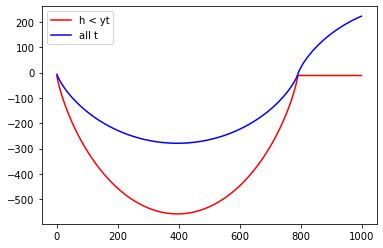

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(len(part1_)),part1_,c="red",label="h < yt")
plt.plot(range(1000),part2_,c="blue",label="all t")
plt.legend()

In [31]:
# 最佳输出值
Hx[790]

19.96